In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, precision_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers

import joblib


In [2]:
entradas_df_norm_entrenamiento = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\entradas_df_norm_entrenamiento.csv",
                              delimiter= ",", decimal= ".")


In [408]:
entradas_df_norm_pruebas = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\entradas_df_norm_pruebas.csv",
                              delimiter= ",", decimal= ".")

In [410]:
entradas_df_norm_pruebas["age"].describe()

count    2994.000000
mean        0.385449
std         0.204600
min         0.000000
25%         0.233333
50%         0.366667
75%         0.533333
max         1.000000
Name: age, dtype: float64

In [4]:
salida_df_entrenamiento = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\salida_df_entrenamiento.csv",
                              delimiter= ",", decimal= ".")
salida_df_entrenamiento = salida_df_entrenamiento["income_<=50K"]

In [5]:
salida_df_pruebas = pd.read_csv("C:\\Users\\crist\\Documents\\UNIVERSIDAD\\Semestre IX\\MachineLearning\\consignas\\RepoEntregaTres\\salida_df_pruebas.csv",
                              delimiter= ",", decimal= ".")
salida_df_pruebas = salida_df_pruebas["income_<=50K"]

# 8. Model build

Se establece el modelo, estudiar **keras.Sequential, las funciones de activacion, y el optimizador, junto con la funcion de perdidad loss**

In [362]:
modelo = keras.Sequential()
modelo.add(layers.Dense(30, activation="tanh", input_shape=[len(entradas_df_norm_entrenamiento.keys()), ]))
modelo.add(layers.Dense(2, activation="softmax", input_shape=[len(entradas_df_norm_entrenamiento.keys()), ]))
modelo.add(layers.Dense(2, activation="relu", input_shape=[len(entradas_df_norm_entrenamiento.keys()), ]))
modelo.add(layers.Dense(1, activation="sigmoid"))


Se crea el algoritmo

In [364]:
alg_entrenamiento = tf.keras.optimizers.SGD(learning_rate=0.04)
modelo.compile(loss="BinaryCrossentropy", metrics=["mae", "mse", "AUC"], optimizer=alg_entrenamiento)

# 9. Model preview

In [365]:
modelo.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 30)                720       
                                                                 
 dense_88 (Dense)            (None, 2)                 62        
                                                                 
 dense_89 (Dense)            (None, 2)                 6         
                                                                 
 dense_90 (Dense)            (None, 1)                 3         
                                                                 
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________


# 10. Model probe

In [366]:
modelo.predict(entradas_df_norm_entrenamiento[1:3])

1/1 [==============================] - 0s 97ms/step


array([[0.5347679],
       [0.5345195]], dtype=float32)

# 11. Model train

In [367]:
history = modelo.fit(
    entradas_df_norm_entrenamiento,
    salida_df_entrenamiento,
    epochs=100,
    validation_split = 0.2,
    verbose=1
)

Epoch 1/100
300/300 [==============================] - 3s 5ms/step - loss: 0.6936 - mae: 0.5001 - mse: 0.2502 - auc: 0.4856 - val_loss: 0.6932 - val_mae: 0.5000 - val_mse: 0.2500 - val_auc: 0.5332
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6932 - mae: 0.5000 - mse: 0.2500 - auc: 0.5001 - val_loss: 0.6929 - val_mae: 0.4999 - val_mse: 0.2499 - val_auc: 0.5526
Epoch 3/100
300/300 [==============================] - 1s 5ms/step - loss: 0.6928 - mae: 0.4997 - mse: 0.2498 - auc: 0.5159 - val_loss: 0.6927 - val_mae: 0.4997 - val_mse: 0.2498 - val_auc: 0.5462
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6929 - mae: 0.4998 - mse: 0.2499 - auc: 0.5118 - val_loss: 0.6927 - val_mae: 0.4997 - val_mse: 0.2498 - val_auc: 0.5923
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6926 - mae: 0.4997 - mse: 0.2497 - auc: 0.5287 - val_loss: 0.6927 - val_mae: 0.4997 - val_mse: 0.2498 - val_auc: 0.5993
Epoch 6/100
300

In [368]:
historico = pd.DataFrame(history.history)
historico["Epochs"] = history.epoch

# 12. Model validation

Text(0.5, 1.0, 'Gráfica de función de error')

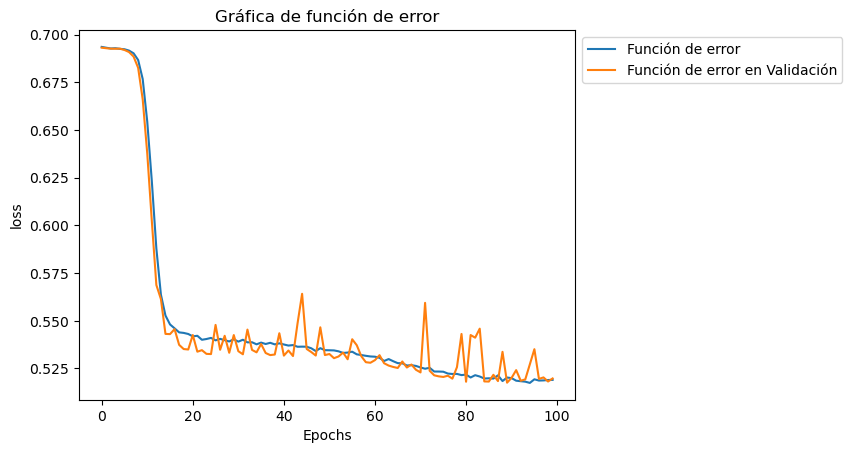

In [369]:
ax001 = sns.lineplot(data=historico, x="Epochs", y="loss", label = "Función de error")
ax001 = sns.lineplot(data=historico, x="Epochs", y="val_loss", label = "Función de error en Validación", ax = ax001)
sns.move_legend(ax001, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica de función de error')

Text(0.5, 1.0, 'Gráfica AUC')

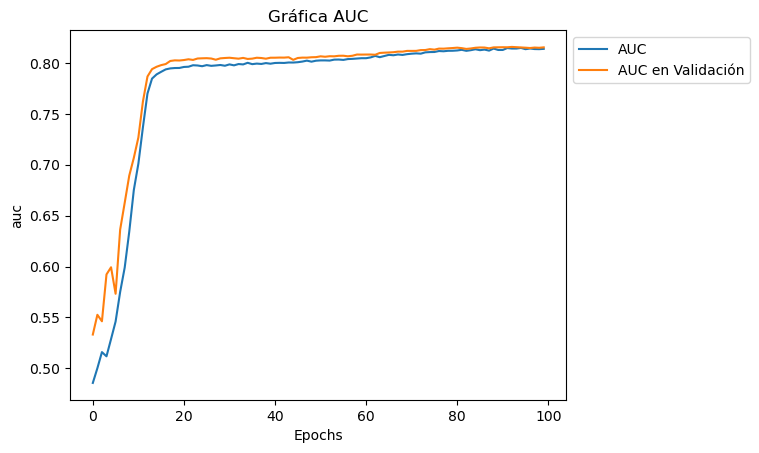

In [370]:
ax002 = sns.lineplot(data=historico, x="Epochs", y="auc", label = "AUC")
ax002 = sns.lineplot(data=historico, x="Epochs", y="val_auc", label = "AUC en Validación", ax = ax002)
sns.move_legend(ax002, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica AUC')

Text(0.5, 1.0, 'Gráfica MSE')

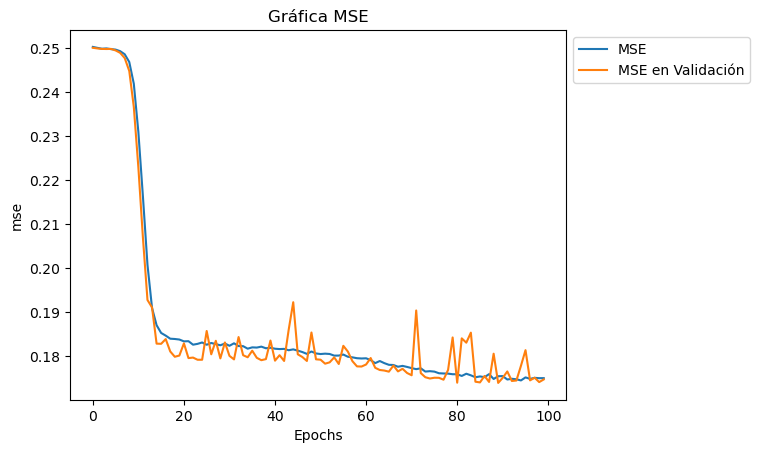

In [371]:
ax003 = sns.lineplot(data=historico, x="Epochs", y="mse", label = "MSE")
ax003 = sns.lineplot(data=historico, x="Epochs", y="val_mse", label = "MSE en Validación", ax = ax003)
sns.move_legend(ax003, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica MSE')

Text(0.5, 1.0, 'Gráfica MAE')

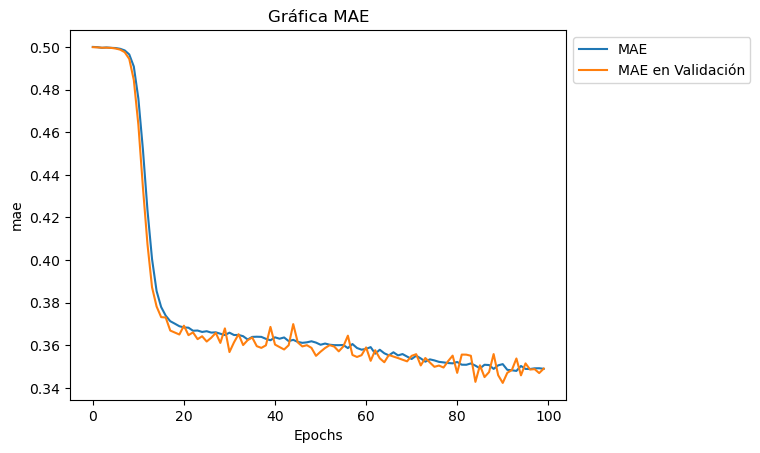

In [372]:
ax004 = sns.lineplot(data=historico, x="Epochs", y="mae", label = "MAE")
ax004 = sns.lineplot(data=historico, x="Epochs", y="val_mae", label = "MAE en Validación", ax = ax004)
sns.move_legend(ax004, "upper left", bbox_to_anchor=(1, 1))
plt.title('Gráfica MAE')

# Validacion con el dataset de pruebas el modelo 

In [373]:
y_pred = modelo.predict(entradas_df_norm_pruebas)
y_pred = np.round(y_pred)

94/94 [==============================] - 0s 2ms/step


In [374]:
cm = confusion_matrix(y_pred, salida_df_pruebas)
print(cm)

[[1050  435]
 [ 460 1049]]


In [375]:
vp = cm[0,0]
vn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

# Validacion de metricas necesarias para la validación -> **son 7**

In [376]:
val_accuracy = accuracy_score(salida_df_pruebas, y_pred)

In [377]:
val_f1_score = f1_score(salida_df_pruebas, y_pred)

In [379]:
val_recall_score = recall_score(salida_df_pruebas, y_pred)

In [380]:
val_especificidad = vn/(vn+fp)

In [382]:
val_precision = precision_score(salida_df_pruebas, y_pred)

# Guardado del modelo entrenado

In [384]:
import pickle

In [386]:
name = 'trained_model.sav'
pickle.dump(modelo, open(name, 'wb'))

INFO:tensorflow:Assets written to: ram://0b6f9fb8-28d2-41ec-b0d5-c1ee9e87e3c3/assets


In [387]:
with open('nombre_del_archivo.pickle', 'wb') as f:
    pickle.dump(modelo, f)

INFO:tensorflow:Assets written to: ram://daaf5bf2-795a-4780-b76b-52ac7dbf2274/assets


In [388]:
f.close()


In [407]:
modelo.save('train')

INFO:tensorflow:Assets written to: train\assets


In [404]:
tf.saved_model.save(modelo, 'C:/Users/crist/Documents/UNIVERSIDAD/Semestre IX/MachineLearning/consignas/RepoEntregaTres/nuevo/')

INFO:tensorflow:Assets written to: C:/Users/crist/Documents/UNIVERSIDAD/Semestre IX/MachineLearning/consignas/RepoEntregaTres/nuevo/assets


In [397]:
entradas_web = pd.read_csv("C:/Users/crist/Documents/UNIVERSIDAD/Semestre IX/MachineLearning/consignas/RepoEntregaTres/entradas_df_norm_pruebas.csv",
                        delimiter= ",", decimal= ".")


In [413]:
entradas_weee = entradas_web.iloc[:,0:21]

In [401]:
z = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1.0, 10.0]
inputAsArray = np.asarray(z)
reshape = inputAsArray.reshape(1,-1)

In [398]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(entradas_web)

MinMaxScaler()

In [402]:
df_norm_entrenamiento = min_max_scaler.transform(reshape)
df_norm_entrenamiento = pd.DataFrame(df_norm_entrenamiento, columns=entradas_web.columns)

c:\Users\crist\anaconda3\envs\machine\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [403]:
y= modelo.predict(df_norm_entrenamiento)

1/1 [==============================] - 0s 79ms/step


In [406]:
joblib.dump(modelo, 'model.pkl')

INFO:tensorflow:Assets written to: ram://4399f701-0c8a-4ab4-88cc-f352a458f941/assets


['model.pkl']

In [ ]:
z = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1.0, 10.0]
inputAsArray = np.asarray(inputData)
reshape = inputAsArray.reshape(1,-1)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(entradas_web)
df_norm_input = min_max_scaler.transform(reshape)
df_norm_input = pd.DataFrame(df_norm_input, columns=entradas_web.columns)